## Import relevant libraries

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Candle-
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Candle-
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\Candle-
[nltk_data]     Store\AppData\Roaming\nltk_data...


True

In [10]:
from nltk.corpus import stopwords #=> stop words removal 
#from nltk import pos_tag #=> for defining part of speech 
from nltk.stem.porter import PorterStemmer #=> stemming word into its root
from nltk.stem.wordnet import WordNetLemmatizer #=> Lemmatizing variants of word to its original form
#from nltk.tokenize import word_tokenize , sent_tokenize #=> for tokenizing sentence

## 1. Normalize 

In [4]:

text = "storing storage to store"
text = text.lower()
print(text)

storing storage to store


## 2. Tokenize

In [5]:
text = word_tokenize(text)
print(text)

['storing', 'storage', 'to', 'store']


## 3. Remove Stopwords

In [6]:

#=> Remove stop words 
words = [w for w in text if w not in stopwords.words("english")]
print(words)

['storing', 'storage', 'store']


## 4. Stem/Lemmatize

In [7]:
#=> Stemming and Lemmatization 
#-> stemmer : returns Nouns and verbs to its root 
# branched , branches , branching -> branch 
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)
#-> Lemmatizer : another technique to return word's variant to its root 
# was , were , is -> be (uses a dictionairy)
# -> It is like the stemmer in most of stuff except it uses a dict + returns a meaningful word
lemmatized = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmatized)

['store', 'storag', 'store']
['storing', 'storage', 'store']


## Spam Classifier by Naive Bayes Part II 

In [11]:
import os 
import pandas as pd 

path = "C:\\Users\\Oreo\\Documents\\NLP-Exercises-master\\NLP-Exercises-master\\1.5-spam-classifier"
print(os.listdir(path))

smsspamcollectionpath = path + "\\smsspamcollection\\SMSSpamCollection"
print(os.listdir(smsspamcollectionpath[:-18]))

df = pd.read_table(smsspamcollectionpath, 
              delimiter='\t' , 
              names=['label','sms'])

df.head(5)

['Bayesian_Inference.ipynb', 'Bayesian_Inference_solution.ipynb', 'images', 'smsspamcollection']
['readme', 'SMSSpamCollection']


,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df['label'] = df['label'].map({'ham':0 , 'spam':1})
df.head(3)

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms'], 
                                                    df['label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [52]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)


# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)


In [53]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)


predictions = naive_bayes.predict(testing_data)

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#=> Accuracy: tp+tn/tp+tn+fp+fn
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
#=> Precision: tp/tp+fp   -> 90 actual emails spam / 90 actual + 10 falsely predicted positive 
#-> false positive : Type 1 , false negative : Type 2 
print('Precision score: ', format(precision_score(y_test, predictions)))
#=> Recall: tp/tp+fn -> 90 truely caught / 90 truely caught + 30 missed 
print('Recall score: ', format(recall_score(y_test, predictions)))
#=> F1 = 2*precision*recall/(precision+recall)
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.9885139985642498
Precision score:  0.9720670391061452
Recall score:  0.9405405405405406
F1 score:  0.9560439560439562


In [62]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)
#--> actual 

 
# [[TP FP] 
# [FN TN]]

array([[1203,    5],
       [  11,  174]], dtype=int64)

##  Another Example

In [10]:
import pprint
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from toolz import pipe
import string
count_vector = CountVectorizer()

documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

def lowercase(sentence):
    return sentence.lower()

def remove_punctuation(sentence):
    return sentence.translate(str.maketrans('', '', string.punctuation))

def remove_whitespace(sentence):
    return sentence.split(' ')

preprocessed_documents = [] 
for document in documents: 
    processed_doc = pipe(document,
                     lowercase,
                      remove_punctuation,
                      remove_whitespace)
    processed_doc = list(processed_doc)
    preprocessed_documents.append(processed_doc)
    
preprocessed_documents

frequency_list = []

for i in preprocessed_documents:
    frequency_counts = Counter(i)
    frequency_list.append(frequency_counts)
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


In [11]:
count_vector.fit(documents)
count_vector.get_feature_names_out()

array(['are', 'call', 'from', 'hello', 'home', 'how', 'me', 'money',
       'now', 'tomorrow', 'win', 'you'], dtype=object)

In [13]:
import pandas as pd
doc_array = count_vector.transform(documents).toarray()
print(doc_array)

frequency_matrix = pd.DataFrame(doc_array, 
                                columns = count_vector.get_feature_names_out())
frequency_matrix

[[1 0 0 1 0 1 0 0 0 0 0 1]
 [0 0 1 0 1 0 0 1 0 0 2 0]
 [0 1 0 0 0 0 1 0 1 0 0 0]
 [0 1 0 2 0 0 0 0 0 1 0 1]]


,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


## BLEU (will not follow this approach)


In [9]:
from nltk.translate.bleu_score import sentence_bleu

# Define a reference and a candidate sentence
reference = [['the', 'quic', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']]
candidate = ['the', 'fast', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']

# Calculate BLEU score
bleu_score = sentence_bleu(reference, candidate)

print("BLEU Score:", bleu_score)


BLEU Score: 0.7506238537503395


## Keyword Matching score

In [14]:
STOP_WORDS = stopwords.words("english")

In [13]:
def keyword_matching_score(student_answer, keywords):
    """
    Calculate the score of a student's answer based on keyword matching.
    
    Parameters:
    - student_answer (str): The student's answer.
    - model_answer (str): The model answer.
    - keywords (list of str): Keywords to match.
    
    Returns:
    - score (float): The keyword matching score.
    """
    # Convert both answers and keywords to lowercase for case-insensitive matching
    student_answer_lower = student_answer.lower()
    
    keywords_lower = [keyword.lower() for keyword in keywords]
    
    # Initialize score
    score = 0
    
    # Calculate score based on keyword matching
    for keyword in keywords_lower:
        if keyword in student_answer_lower:
            score += 1
    
    # Normalize score by dividing by the total number of keywords
    if keywords_lower:
        score /= len(keywords_lower)
    
    return score

student_answer = "By using a dynamic programming approach along with graph ds"
keywords = ["dynamic programming", "bfs", "graph"]

score = keyword_matching_score(student_answer, keywords)
print("Keyword Matching Score:", score)


Keyword Matching Score: 0.6666666666666666


## Already made TF-IDF

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def tfidf_similarity(student_answer, model_answer):
    """
    Calculate the TF-IDF similarity score between a student's answer and a model answer.
    
    Parameters:
    - student_answer (str): The student's answer.
    - model_answer (str): The model answer.
    
    Returns:
    - similarity_score (float): The TF-IDF similarity score.
    """
    
    
    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer(input='content',analyzer='word',
                                 decode_error='ignore')

    # Fit the vectorizer on the model answer
    vectorizer.fit([model_answer])

    # Transform both answers into TF-IDF vectors
    tfidf_matrix = vectorizer.transform([student_answer, model_answer])

    # Calculate cosine similarity between the TF-IDF vectors
    similarity_score = cosine_similarity(tfidf_matrix)[0, 1]

    return similarity_score

# Example usage:
model_answer = "A data structure is a storage format that defines the way data is stored, organized, and manipulated. Like trees , graphs and lists"
student_answer = "A data structure is a format for storage , ogranizing and manipulating data. some examples of data structures are trees , graphs and lists"

tfidf_score = tfidf_similarity(student_answer, model_answer)
print("TF-IDF Similarity Score:", tfidf_score)


TF-IDF Similarity Score: 0.7893522173763264


## Manual Tf-IDF

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Candle-
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
Extra_Stop_Words = {"the",",","a", "an", "and", "or", "in", "on", "to", "is", "are", "was", "were", "am", "i", "you", "he", "she", "it", "we", "they", "for", "of", "that", "this", "with", "as", "at", "by", "from", "up", "down", "out", "about", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"}
STOP_WORDS = set(stopwords.words("english"))
STOP_WORDS = STOP_WORDS.union(Extra_Stop_Words)

In [17]:
import math
from collections import Counter
def calculate_tf(document):
    tf = {}
    word_count = Counter(document)
    total_words = len(document)
    for word, count in word_count.items():
        tf[word] = count / total_words
    return tf

def calculate_idf(documents):
    k=0.3
    total_documents = len(documents)
    all_words = set(word for document in documents for word in document)
    idf = {word: math.log((total_documents + k) / (1 + sum(1 for doc in documents if word in doc))) for word in all_words}
    return idf


def calculate_tfidf(tf, idf):
    tfidf = {word: tf[word] * idf[word] for word in tf}
    return tfidf

def cosine_similarity(vector1, vector2):
    dot_product = sum(vector1.get(word, 0) * vector2.get(word, 0) for word in set(vector1) & set(vector2))
    
    magnitude1 = math.sqrt(sum(value ** 2 for value in vector1.values()))
    magnitude2 = math.sqrt(sum(value ** 2 for value in vector2.values()))
    
    if magnitude1 != 0 and magnitude2 != 0:
        return dot_product / (magnitude1 * magnitude2)
    else:
        return 0

# # to be used in the next cell
# model_answer = "A data structure is a storage format that defines the way data is stored, organized, and manipulated. Like trees , graphs and lists"
# student_answer = "A data structure is a format for storage , ogranizing and manipulating data. some examples of data structures are trees , graphs and lists"

# tokens1 = [word for word in model_answer.lower().split() if word not in STOP_WORDS]
# tokens2 = [word for word in student_answer.lower().split() if word not in STOP_WORDS]

# documents = [tokens1, tokens2]
# tf1 = calculate_tf(tokens1)
# tf2 = calculate_tf(tokens2)
# idf = calculate_idf(documents)
# tfidf1 = calculate_tfidf(tf1, idf)
# tfidf2 = calculate_tfidf(tf2, idf)
# similarity_score = cosine_similarity(tfidf1, tfidf2)
# print("Manual TF-IDF Similarity Score:", similarity_score)

Mix Word2Vec and TF-IDF (Not Complete) and may be not the best solution so far

## We want to separate function implementation from the main code

In [18]:
model_answer = "A data structure is a storage format that defines the way data is stored, organized, and manipulated. Like trees , graphs and lists"
student_answer = "A data structure helps in storing, organizing and manipulating data. Examples of data structures include trees, graphs and lists."
bad_student_answer = "My grandma died two years ago and I have been feeling very sad since then."

tokens1 = [word for word in model_answer.lower().split() if word not in STOP_WORDS]
tokens2 = [word for word in student_answer.lower().split() if word not in STOP_WORDS]
tokens3 = [word for word in bad_student_answer.lower().split() if word not in STOP_WORDS]

keywords = ["data structure", "storage", "format", "organize", "manipulate", "tree", "graph", "list"]

documents = [tokens1, tokens2]
tf1 = calculate_tf(tokens1)
tf2 = calculate_tf(tokens2)
idf = calculate_idf(documents)
tfidf1 = calculate_tfidf(tf1, idf)
tfidf2 = calculate_tfidf(tf2, idf)
similarity_score = cosine_similarity(tfidf1, tfidf2)
keywords_score = keyword_matching_score(student_answer, keywords)
print("Manual TF-IDF Similarity Score:", similarity_score)
print("Keyword Matching Score:", keywords_score)
try :
    print("Final Score Metric 1 :", 3.275 * (similarity_score * keywords_score) / (similarity_score + keywords_score))
    print("Final Score Metric 2 :", (similarity_score/keywords_score) * (similarity_score + keywords_score)/1.65)
except ZeroDivisionError:
    print("Final Score:", 0)

NameError: name 'keyword_matching_score' is not defined

In [ ]:
model_answer = "A data structure is a storage format that defines the way data is stored, organized, and manipulated. Like trees , graphs and lists"
# student_answer = "A data structure helps in storing, organizing and manipulating data. Examples of data structures include trees, graphs and lists."
bad_student_answer = "My grandma died two years ago to defines in a graph format and she fell from a tree while manipulated grandpa who was stored in a can."

tokens1 = [word for word in model_answer.lower().split() if word not in STOP_WORDS]
# tokens2 = [word for word in student_answer.lower().split() if word not in STOP_WORDS]
tokens3 = [word for word in bad_student_answer.lower().split() if word not in STOP_WORDS]

keywords = ["data structure", "storage", "format", "organize", "manipulate", "tree", "graph", "list"]

documents = [tokens1, tokens3]
tf1 = calculate_tf(tokens1)
tf2 = calculate_tf(tokens3)
idf = calculate_idf(documents)
tfidf1 = calculate_tfidf(tf1, idf)
tfidf2 = calculate_tfidf(tf2, idf)
similarity_score = cosine_similarity(tfidf1, tfidf2)
keywords_score = keyword_matching_score(bad_student_answer, keywords)
print("Manual TF-IDF Similarity Score:", similarity_score)
print("Keyword Matching Score:", keywords_score)
try :
    print("Final Score Metric 1 :", 3.275 * (similarity_score * keywords_score) / (similarity_score + keywords_score))
    print("Final Score Metric 2 :", (similarity_score/keywords_score) * (similarity_score + keywords_score)/1.65)
except ZeroDivisionError:
    print("Final Score:", 0)


Manual TF-IDF Similarity Score: 0.35777844109636364
Keyword Matching Score: 0.5
Final Score Metric 1 : 0.6829994427774143
Final Score Metric 2 : 0.37199349510487995


In [ ]:
model_answer = "A data structure is a storage format that defines the way data is stored, organized, and manipulated. Like trees , graphs and lists"
# student_answer = "A data structure helps in storing, organizing and manipulating data. Examples of data structures include trees, graphs and lists."
bad_student_answer = "My grandma died two years ago she fell from a tree while manipulated grandpa"

tokens1 = [word for word in model_answer.lower().split() if word not in STOP_WORDS]
# tokens2 = [word for word in student_answer.lower().split() if word not in STOP_WORDS]
tokens3 = [word for word in bad_student_answer.lower().split() if word not in STOP_WORDS]

keywords = ["data structure", "storage", "format", "organize", "manipulate", "tree", "graph", "list"]

documents = [tokens1, tokens3]
tf1 = calculate_tf(tokens1)
tf2 = calculate_tf(tokens3)
idf = calculate_idf(documents)
tfidf1 = calculate_tfidf(tf1, idf)
tfidf2 = calculate_tfidf(tf2, idf)
similarity_score = cosine_similarity(tfidf1, tfidf2)
keywords_score = keyword_matching_score(bad_student_answer, keywords)
print("Manual TF-IDF Similarity Score:", similarity_score)
print("Keyword Matching Score:", keywords_score)
try :
    print("Final Score Metric 1 :", 3.275 * (similarity_score * keywords_score) / (similarity_score + keywords_score))
    print("Final Score Metric 2 :", (similarity_score/keywords_score) * (similarity_score + keywords_score)/1.65)
except ZeroDivisionError:
    print("Final Score:", 0)



Manual TF-IDF Similarity Score: 0.0
Keyword Matching Score: 0.25
Final Score Metric 1 : 0.0
Final Score Metric 2 : 0.0


In [ ]:
# w mmkn b2a n3ml eh , n5ly el fraction yb2a kda badal ma yb2a rakam constant

(similarity_score/keywords_score) * (similarity_score + keywords_score)/1.85

0.8763217734753181

In [14]:
from nltk.corpus import stopwords #=> stop words removal 
from collections import Counter
#from nltk import pos_tag #=> for defining part of speech 
from nltk.stem.porter import PorterStemmer #=> stemming word into its root
from nltk.stem.wordnet import WordNetLemmatizer #=> Lemmatizing variants of word to its original form
#from nltk.tokenize import word_tokenize , sent_tokenize #=> for tokenizing sentence
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('ggplot')

class AnswerEvaluator:
    def __init__(self, model_answer, extra_stop_words=None):
        self.model_answer = model_answer
        self.STOP_WORDS = set(stopwords.words("english"))
        if extra_stop_words:
            self.STOP_WORDS = self.STOP_WORDS.union(set(extra_stop_words))
    
    def calculate_tf(self, document):
        tf = {}
        word_count = Counter(document)
        total_words = len(document)
        for word, count in word_count.items():
            tf[word] = count / total_words
        return tf

    def calculate_idf(self, documents):
        k=0.3
        total_documents = len(documents)
        all_words = set(word for document in documents for word in document)
        idf = {word: math.log((total_documents + k) / (1 + sum(1 for doc in documents if word in doc))) for word in all_words}
        return idf

    def calculate_tfidf(self, tf, idf):
        tfidf = {word: tf[word] * idf[word] for word in tf}
        return tfidf

    def cosine_similarity(self, vector1, vector2):
        dot_product = sum(vector1.get(word, 0) * vector2.get(word, 0) for word in set(vector1) & set(vector2))

        magnitude1 = math.sqrt(sum(value ** 2 for value in vector1.values()))
        magnitude2 = math.sqrt(sum(value ** 2 for value in vector2.values()))

        if magnitude1 != 0 and magnitude2 != 0:
            return dot_product / (magnitude1 * magnitude2)
        else:
            return 0

    def keyword_matching_score(self, student_answer, keywords):
        student_answer_lower = student_answer.lower()
        keywords_lower = [keyword.lower() for keyword in keywords]
        score = 0
        for keyword in keywords_lower:
            if keyword in student_answer_lower:
                score += 1
        if keywords_lower:
            score /= len(keywords_lower)
        return score

    def evaluate(self, student_answer, keywords):
        tokens1 = [word for word in self.model_answer.lower().split() if word not in self.STOP_WORDS]
        tokens2 = [word for word in student_answer.lower().split() if word not in self.STOP_WORDS]

        # lemmatize , then stem 
        #tokens1 = [PorterStemmer().stem(WordNetLemmatizer().lemmatize(word)) for word in tokens1]
        #tokens2 = [PorterStemmer().stem(WordNetLemmatizer().lemmatize(word)) for word in tokens2]

        documents = [tokens1, tokens2]
        tf1 = self.calculate_tf(tokens1)
        tf2 = self.calculate_tf(tokens2)
        idf = self.calculate_idf(documents)
        tfidf1 = self.calculate_tfidf(tf1, idf)
        tfidf2 = self.calculate_tfidf(tf2, idf)
        similarity_score = self.cosine_similarity(tfidf1, tfidf2)
        keywords_score = self.keyword_matching_score(student_answer, keywords)
        try :
            final_score = (similarity_score/keywords_score) * (similarity_score + keywords_score)/2
        except ZeroDivisionError:
            final_score = 0
        return 1 if final_score > 1 else final_score
    

In [20]:
class FeedbackGenerator:
    def __init__(self, evaluator, scores, stop_words):
        self.evaluator = evaluator
        self.scores = scores
        self.stop_words = stop_words
        self.feedback_message = "Thanks for completing the interview. Here's your feedback:\n"

    def generate_feedback_message(self):
        technical_score = self.scores['technical']
        linguistic_score = self.scores['linguistic']
        behavioral_score = self.scores['behavioral']

        if technical_score < 0.5:
            self.feedback_message += "Your technical proficiency needs improvement.\n"
        elif technical_score < 0.7:
            self.feedback_message += "You're doing well in technical aspects, but there's room for improvement.\n"
        elif technical_score < 1.0:
            self.feedback_message += "Your technical skills are impressive.\n"
        

        if linguistic_score < 0.5:
            self.feedback_message += "Your linguistic skills could be enhanced.\n"
        elif linguistic_score < 0.7:
            self.feedback_message += "Your linguistic expression is satisfactory, but could be improved.\n"
        elif linguistic_score < 1.0:
            self.feedback_message += "Your linguistic expression is excellent.\n"

        if behavioral_score < 0.5:
            self.feedback_message += "Your behavioral conduct needs attention.\n"
        elif behavioral_score < 0.7:
            self.feedback_message += "Your behavioral performance is acceptable, but could be better.\n"
        elif behavioral_score < 1.0:
            self.feedback_message += "Your behavioral performance is commendable.\n"

        # Additional feedback based on combined scores or other criteria can be added here
        
        return self.feedback_message
    
    def spider_graph_generator(self):
    #split the dict into 2 lists
        scores_dict = self.scores
        scores = list(scores_dict.values())
        
        if max(scores) < 1:
            scores = [round(score,0)*100 for score in scores]
    
        scores_dict = list(scores_dict.keys())


        scores_dict_angles = np.linspace(0,2*np.pi,len(scores) , endpoint = False)
        scores_dict_angles = np.concatenate((scores_dict_angles, [scores_dict_angles[0]]))
        scores.append(scores[0])
        scores_dict.append(scores_dict[0])
        
        fig=plt.figure(figsize=(6,6))
        ax=fig.add_subplot(polar=True)
        #basic plot
        ax.plot(scores_dict_angles,scores, 'o--', color='g', linewidth=2, label='Scores')
        #fill plot
        ax.fill(scores_dict_angles, scores, alpha=0.25, color='g')
        #Add labels
        ax.set_thetagrids(scores_dict_angles * 180/np.pi, scores_dict)
        plt.grid(True)
        plt.tight_layout()
        plt.legend()
        plt.show()

Technical Score: 0.9362582758618654
Thanks for completing the interview. Here's your feedback:
Your technical skills are impressive.
Your linguistic expression is excellent.
Your behavioral conduct needs attention.



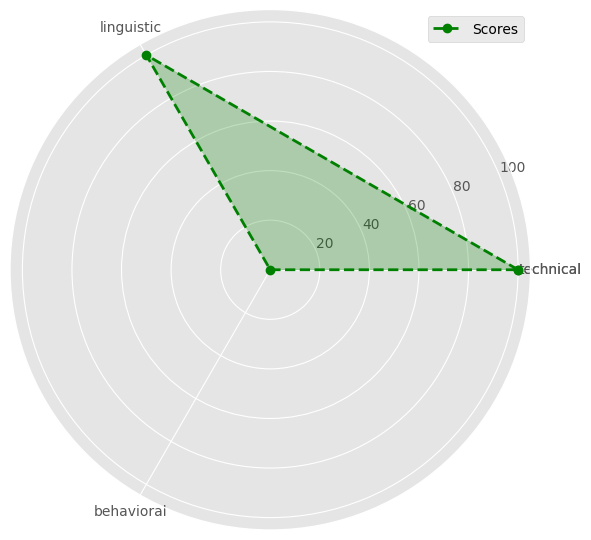

In [24]:
# test classes 
model_answer = "A data structure is a storage format that defines the way data is stored, organized, and manipulated. Like trees , graphs and lists"
evaluator = AnswerEvaluator(model_answer, extra_stop_words=Extra_Stop_Words)
student_answer = "A data structure is a format for storage , ogranizing and manipulating data. some examples of data structures are trees , graphs and lists"
keywords = ["data structure", "storage", "format", "organize", "manipulate", "tree", "graph", "list"]
technical_score = evaluator.evaluate(student_answer, keywords)
print("Technical Score:", technical_score)
feedback_generator = FeedbackGenerator(evaluator, {"technical": technical_score, "linguistic": 0.7, "behavioral": 0.3}, stop_words=STOP_WORDS)
feedback = feedback_generator.generate_feedback_message()
print(feedback)
feedback_generator.spider_graph_generator()


In [22]:
# corner case ... 
model_answer = "Graphs are not trees"
evaluator = AnswerEvaluator(model_answer, extra_stop_words=Extra_Stop_Words)
student_answer = "Graphs are trees"
keywords = ["graph", "trees", "graphs", "tree"]
technical_score = evaluator.evaluate(student_answer, keywords)
print(technical_score)
feedback_generator = FeedbackGenerator(evaluator, {"technical": technical_score, "linguistic": 0.7, "behavioral": 0.6}, stop_words=STOP_WORDS)
feedback = feedback_generator.generate_feedback_message()
print(feedback)


1
Thanks for completing the interview. Here's your feedback:
Your linguistic expression is excellent.
Your behavioral performance is acceptable, but could be better.



In [23]:
# import lemmatizer and stemmer 
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# test lemmatizer and stemmer on plural words 
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
plural = ["bringings" , "shops", "stores" , "storages"]
singular = [lemmatizer.lemmatize(word) for word in plural] #=> for plural 
print(singular)
verbs_ =["bringing" , "shrunk", "stored"]
infinitive = [stemmer.stem(word) for word in singular] #=> for ing and ed verbs
print(infinitive)

['bringing', 'shop', 'store', 'storage']
['bring', 'shop', 'store', 'storag']
